In [1]:
from keras.layers import Input, Dense, Conv2D,MaxPooling2D,UpSampling2D,Dropout,Flatten
from keras.models import Model, Sequential
from keras.datasets import mnist
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras import backend as K

def extract_layer_output(model, layer_num):
    return K.function([model.input] + [K.learning_phase()], [model.layers[layer_num].output])

Using TensorFlow backend.


##Problem 1 Autoencoder

In [2]:
# load fashion mnist data
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()
labels =['t-shirt', 'trouser', 'pullover', 'dress', 'coat','snadal', 'shirt', 'sneaker','bag','ankle boot']
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(X_train.shape)

4423680/4422102 [==============================] - 6s 1us/step
(60000, 28, 28, 1)


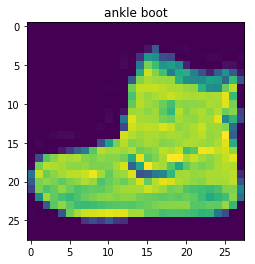

In [3]:
plt.imshow(X_train[0,:,:].reshape(28,28))
plt.title(labels[y_train[0]])
plt.show()

In [4]:
#construct encoder
c_auto  = Sequential()
# encoding
c_auto.add(Conv2D(filters = 32,kernel_size= (3,3), activation= 'relu', padding='same',strides=(1,1), input_shape = (28,28,1)))
c_auto.add(MaxPooling2D((2,2), padding ='same'))
c_auto.add(Conv2D(filters = 32,kernel_size= (3,3), activation= 'relu', padding='same',strides=(1,1)))
c_auto.add(MaxPooling2D((2,2), padding = 'same'))
c_auto.add(Conv2D(filters = 32,kernel_size= (3,3), activation= 'relu', padding='same',strides=(1,1)))
c_auto.add(MaxPooling2D((2,2), padding = 'same'))

# decoding
c_auto.add(Conv2D(filters =8,kernel_size= (3,3), activation= 'relu', padding='same',strides=(1,1)))
c_auto.add(UpSampling2D((2,2)))
c_auto.add(Conv2D(filters = 8,kernel_size= (3,3), activation= 'relu', padding='same',strides=(1,1)))
c_auto.add(UpSampling2D((2,2)))
c_auto.add(Conv2D(filters = 16,kernel_size= (3,3), activation= 'relu',strides=(1,1)))
c_auto.add(UpSampling2D((2,2)))
c_auto.add(Conv2D(filters = 1,kernel_size= (3,3), activation= 'sigmoid', padding='same'))

c_auto.compile(optimizer = 'adadelta', loss ='binary_crossentropy')
c_auto.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           2312      
__________

In [5]:
# model training
c_auto.fit(X_train, X_train, epochs = 3, batch_size = 256, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 135s 3ms/step - loss: -1138.4661 - val_loss: -1153.7185
Epoch 2/3
42000/42000 [==============================] - 135s 3ms/step - loss: -1147.9049 - val_loss: -1155.7969
Epoch 3/3
42000/42000 [==============================] - 136s 3ms/step - loss: -1149.4998 - val_loss: -1156.6548


In [6]:
f=extract_layer_output(c_auto, 5)
decodedpic= c_auto.predict(X_test[:10,:])
encodedpic =f([X_test[:10,:]])[0]

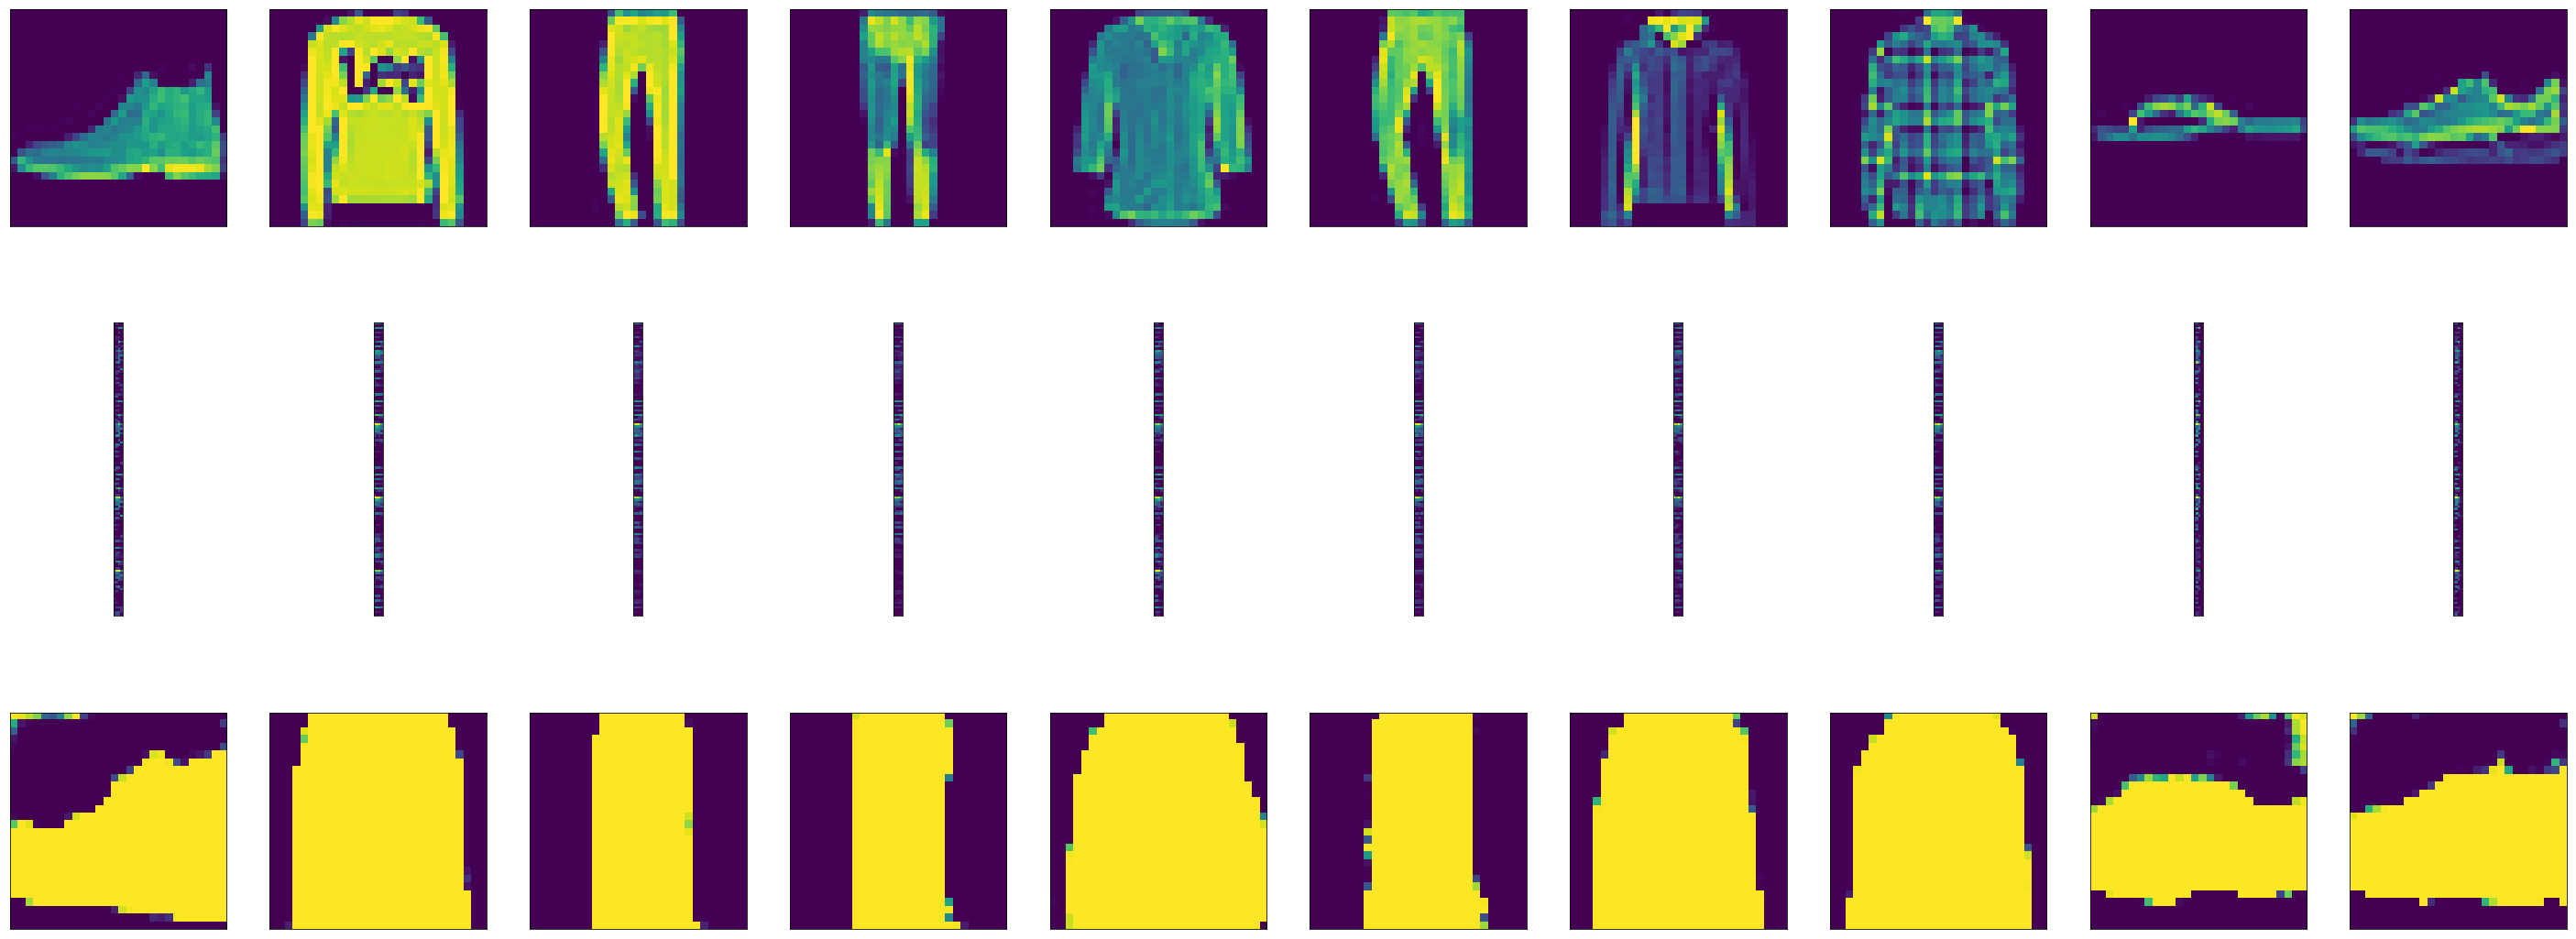

In [7]:
plt.figure(figsize=(50,20))
for i in range(10):
    
    #original
    ax = plt.subplot(3,10,i+1)
    plt.imshow(X_test[i,:].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #encoded
    ax = plt.subplot(3,10,i+10+1)
    plt.imshow(encodedpic[i].reshape(4, 4 * 32).T)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #decoded
    ax = plt.subplot(3,10,i+20+1)
    plt.imshow(decodedpic[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

###Problem 2 Image Classification
###2.1 deep CNN

In [8]:
cnn = Sequential()
cnn.add(Conv2D(filters =64 ,kernel_size=(4, 4), 
                 activation='relu', strides=(1, 1), 
                 padding='same',
                 input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(filters = 64,kernel_size=(4, 4), 
                 activation='relu', strides=(1, 1), 
                 padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        65600     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [9]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
cnn.compile(loss = 'categorical_crossentropy',
            optimizer='adam',
            metrics = ['accuracy'])
cnn.fit(X_train, Y_train,
          epochs=4,
          batch_size=128,
        validation_split = 0.3)
y_pred = cnn.predict_classes(X_test)
# accuracy on test set
#(y_pred == y_test).sum()/len(y_test)
score = cnn.evaluate(X_test, Y_test, verbose=1)
print(score[1])

Train on 42000 samples, validate on 18000 samples
Epoch 1/4
42000/42000 [==============================] - 194s 5ms/step - loss: 2.9888 - acc: 0.5749 - val_loss: 0.4607 - val_acc: 0.8366
Epoch 2/4
42000/42000 [==============================] - 207s 5ms/step - loss: 0.5982 - acc: 0.7860 - val_loss: 0.3830 - val_acc: 0.8603
Epoch 3/4
42000/42000 [==============================] - 222s 5ms/step - loss: 0.4951 - acc: 0.8227 - val_loss: 0.3406 - val_acc: 0.8708
Epoch 4/4
42000/42000 [==============================] - 230s 5ms/step - loss: 0.4462 - acc: 0.8389 - val_loss: 0.3153 - val_acc: 0.8834


0.8787

The network contains two convolution layers each with 64 3 by 3 filters, striding 1 by 1. Each convolution layer is followed by a max pooling layer with size 2 by 2. Drop out is applied on the last max pooling layer. After, the network contains two dense layers with 64 and 10 neurons respectively. Drop out is applied on both layer. Relu activation is applied on all but last layer, where softmax is used.
<br>The model is trained for 4 epochs with 30% validation. Model accuracy is 88.34% for train set and 87.87% for test set.

###2.2 Transfer Learning

In [10]:
#transfer learning
from keras.applications import ResNet50
from scipy.misc import imresize
from keras.preprocessing.image import img_to_array, array_to_img

In [11]:
resX_train = X_train
resX_test = X_test
resX_train = np.c_[X_train,X_train,X_train]
resX_test = np.c_[X_test, X_test,X_test]
resX_train = np.asarray([img_to_array(array_to_img(im, scale  = False).resize((50,50))) for im in resX_train])
resX_test = np.asarray([img_to_array(array_to_img(im, scale  = False).resize((50,50))) for im in resX_test])
conv_base = ResNet50(weights="imagenet",include_top=False,input_shape=(50,50,3))
t_model = Sequential()
t_model.add(conv_base)
t_model.add(Flatten())
t_model.add(Dense(256, activation="relu"))
t_model.add(Dropout(0.5))
t_model.add(Dense(10, activation="softmax"))   
conv_base.trainable = False
t_model.summary()

C:\Users\Danielle\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 187s 2us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 25,687,690
Trainable params: 2,099,978
Non-trainable params: 23,587,712
_________________________________________________________________


In [12]:
t_model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["acc"])
t_model.fit(resX_train, Y_train,
          epochs=4,
          batch_size=128,
        validation_split = 0.3)


Train on 42000 samples, validate on 18000 samples
Epoch 1/4
42000/42000 [==============================] - 3225s 77ms/step - loss: 0.7002 - acc: 0.7719 - val_loss: 2.1593 - val_acc: 0.4207
Epoch 2/4
42000/42000 [==============================] - 3559s 85ms/step - loss: 0.4637 - acc: 0.8360 - val_loss: 1.9645 - val_acc: 0.4774
Epoch 3/4
42000/42000 [==============================] - 2791s 66ms/step - loss: 0.3991 - acc: 0.8571 - val_loss: 2.1574 - val_acc: 0.4429
Epoch 4/4
42000/42000 [==============================] - 2831s 67ms/step - loss: 0.3518 - acc: 0.8715 - val_loss: 2.6965 - val_acc: 0.3957


In [15]:
score = t_model.evaluate(resX_test, Y_test, verbose=1)
print(score[1])

10000/10000 [==============================] - 388s 39ms/step
0.3915


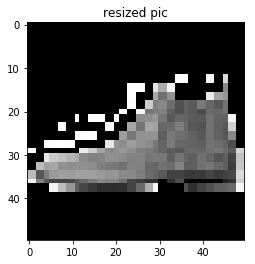

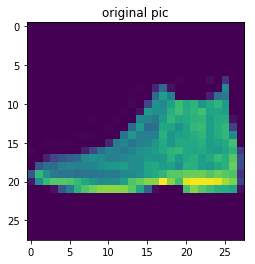

In [19]:
#sum(t_model.predict_classes(resX_test) == y_test)/len(y_test)
plt.imshow(resX_test[0])
plt.title('resized pic')
plt.show()
plt.imshow(X_test[0,:].reshape(28,28))
plt.title('original pic')
plt.show()

We used pretrained resnet50 network with two dense layers at last. Since resnet requires a minimum image size of 32* 32 with 3 channels, we resized the image and stacked the orginal on itself to create such shape.
<br>With 4 epochs, the model acchieves 87.15% on training set and around 40% accuracy on validation and test sets. With more epochs, the result can improve.

##Problem 3 Text Classification
###3,1 RNN 

In [21]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# create tokenization and character embedding# create 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Bidirectional, LSTM, GRU, SpatialDropout1D, Dropout, Dense, Conv1D, MaxPool1D, Flatten
from keras.models import Sequential
import pandas as pd 

number of instances:  67311


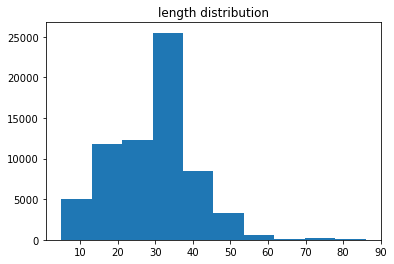

In [23]:
# load data
def load_data():
    ben = []
    with open('benign-urls.txt','r') as f:
        for line in f:
            if not line.startswith('#'):
                ben.append(line.strip())
    mal =[]
    with open('malicious-urls.txt','r') as f:
        for line in f:
            mal.append(line.strip())
    
    # combine data create labels and shuffle data
    labels = [0]*len(ben)+[1]*len(mal)
    data = np.array([[text, l] for text, l in zip(ben+mal, labels)])
    np.random.shuffle(data)
    return list(data[:,0]), data[:,1]
X,y = load_data()
y = y.astype(int)
print('number of instances: ',len(X))
lengths = list(map(len, X))
plt.hist(lengths)
plt.title('length distribution')
plt.show()

In [24]:
train_X, test_X,train_y, test_y = train_test_split(X,y, test_size =0.3,random_state = 100 )
max_len = 55
char_dimension = 30
tok  = Tokenizer(char_level=True)
tok.fit_on_texts(train_X)
train_X_tok = tok.texts_to_sequences(train_X)
test_X_tok = tok.texts_to_sequences(test_X)
train_X_tok =pad_sequences(train_X_tok, maxlen =max_len)
test_X_tok = pad_sequences(test_X_tok, maxlen = max_len)
num_char =len(tok.word_index)

In [25]:
rnn = Sequential()
rnn.add( Embedding(num_char+1,char_dimension,input_length=max_len))
rnn.add(Bidirectional(LSTM(64,return_sequences=True, recurrent_dropout=0.1, dropout=0.1)))
rnn.add(Flatten())
rnn.add(Dense(1, activation='sigmoid'))
rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 55, 30)            1260      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 55, 128)           48640     
_________________________________________________________________
flatten_3 (Flatten)          (None, 7040)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7041      
Total params: 56,941
Trainable params: 56,941
Non-trainable params: 0
_________________________________________________________________


In [29]:
rnn.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
rnn.fit(train_X_tok, train_y, epochs=5, batch_size=128, validation_split=0.3)

Train on 32981 samples, validate on 14136 samples
Epoch 1/5
32981/32981 [==============================] - 91s 3ms/step - loss: 0.0275 - acc: 0.9873 - val_loss: 0.0278 - val_acc: 0.9861
Epoch 2/5
32981/32981 [==============================] - 85s 3ms/step - loss: 0.0243 - acc: 0.9880 - val_loss: 0.0249 - val_acc: 0.9884
Epoch 3/5
32981/32981 [==============================] - 83s 3ms/step - loss: 0.0230 - acc: 0.9889 - val_loss: 0.0264 - val_acc: 0.9879
Epoch 4/5
32981/32981 [==============================] - 79s 2ms/step - loss: 0.0220 - acc: 0.9887 - val_loss: 0.0256 - val_acc: 0.9892
Epoch 5/5
32981/32981 [==============================] - 70s 2ms/step - loss: 0.0212 - acc: 0.9894 - val_loss: 0.0369 - val_acc: 0.9844


###3.2 CNN

In [27]:
cnn = Sequential()
cnn.add(Embedding(num_char+1,char_dimension,input_length=max_len))
cnn.add(Conv1D(128,activation='relu', kernel_size=3,padding='valid'))
cnn.add(SpatialDropout1D(0.1))
cnn.add(MaxPool1D())
cnn.add(Conv1D(64,activation='relu', kernel_size=3,padding='valid'))
cnn.add(SpatialDropout1D(0.1))
cnn.add(MaxPool1D())
cnn.add(Flatten())
cnn.add(Dense(1, activation='sigmoid'))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 55, 30)            1260      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 53, 128)           11648     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 53, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 26, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 24, 64)            24640     
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 24, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 12, 64)            0         
__________

In [30]:
cnn.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
cnn.fit(train_X_tok, train_y, epochs=5, batch_size=128, validation_split=0.3)


Train on 32981 samples, validate on 14136 samples
Epoch 1/5
32981/32981 [==============================] - 25s 757us/step - loss: 0.0205 - acc: 0.9900 - val_loss: 0.0235 - val_acc: 0.9883
Epoch 2/5
32981/32981 [==============================] - 23s 702us/step - loss: 0.0190 - acc: 0.9909 - val_loss: 0.0210 - val_acc: 0.9900
Epoch 3/5
32981/32981 [==============================] - 22s 675us/step - loss: 0.0179 - acc: 0.9916 - val_loss: 0.0206 - val_acc: 0.9898
Epoch 4/5
32981/32981 [==============================] - 23s 705us/step - loss: 0.0168 - acc: 0.9922 - val_loss: 0.0214 - val_acc: 0.9905
Epoch 5/5
32981/32981 [==============================] - 23s 685us/step - loss: 0.0158 - acc: 0.9929 - val_loss: 0.0198 - val_acc: 0.9913


###3.3 Be sure to directly compare your two methods with an ROC curve or similar validation method. Don’t forget to create a train-test split.

In [31]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
rnn_pred =rnn.predict_classes(test_X_tok)
rnn_prob =rnn.predict_proba(test_X_tok)
print('RNN performance')
print('Precision: ',precision_score(test_y, rnn_pred))
print('Recall: ',recall_score(test_y, rnn_pred))
print('F1: ',f1_score(test_y, rnn_pred))
print('ROC AUC: ',roc_auc_score(test_y, rnn_prob))
print('\n====================================\n')
cnn_pred =cnn.predict_classes(test_X_tok)
cnn_prob =cnn.predict_proba(test_X_tok)
print('CNN performance:')
print('Precision: ',precision_score(test_y, cnn_pred))
print('Recall: ',recall_score(test_y,cnn_pred))
print('F1: ',f1_score(test_y, cnn_pred))
print('ROC AUC: ',roc_auc_score(test_y, cnn_prob))


RNN performance
Precision:  0.5734375
Recall:  0.9434447300771208
F1:  0.7133138969873664
ROC AUC:  0.99384616982157


CNN performance:
Precision:  0.7481840193704601
Recall:  0.794344473007712
F1:  0.770573566084788
ROC AUC:  0.9959345261544272


We compared an rnn model with 64 bidirectional lstm units and a cnn model with two convoluiton layers with 128 and 64 filters respectively. Both models are layered on an character embedding with 40 characters and 55 dimensions and are trained for 5 epochs. The resulting models has similar trainable parameters. CNN model has much better precision than RNN model, yet RNN model has wins recall. The ROC AUC are high as 0.99 for both models due to imbalanced class size. In terms of training time, the CNN model trains almost 4 times faster than RNN model.